In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime, timedelta 

In [2]:
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 1

In [3]:
data2016 = pd.read_csv('Dhaka_PM2.5_2016_YTD.csv')
data2017 = pd.read_csv('Dhaka_PM2.5_2017_YTD.csv')
data2018 = pd.read_csv('Dhaka_PM2.5_2018_YTD.csv')
data2019 = pd.read_csv('Dhaka_PM2.5_2019_YTD.csv')
data2020 = pd.concat([pd.read_csv('Dhaka_PM2.5_2020_YTD.csv'), pd.read_csv('Dhaka_PM2.5_2020_06_MTD.csv')])

In [4]:
#%%timeit -n 50
df = pd.concat([data2016,data2017, data2018, data2019, data2020])
df = df[df['AQI']>=0]
#df = pd.concat([data2016, data2017, data2018, data2019, data2020])


In [5]:
# #%%timeit -n 50
# valid2019 = data2019[data2019['AQI']>=0]
# valid2017 = data2017[data2017['AQI']>=0]
# valid2018 = data2018[data2018['AQI']>=0]
# valid2016 = data2016[data2016['AQI']>=0]
# valid2020 = data2020[data2020['AQI']>=0]
# df = pd.concat([valid2016, valid2017, valid2018, valid2019, valid2020])
# #df = pd.concat([data2016, data2017, data2018, data2019, data2020])


In [6]:
df['Date'] = pd.to_datetime(df['Date (LT)'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34859 entries, 1442 to 287
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           34859 non-null  object        
 1   Parameter      34859 non-null  object        
 2   Date (LT)      34859 non-null  object        
 3   Year           34859 non-null  int64         
 4   Month          34859 non-null  int64         
 5   Day            34859 non-null  int64         
 6   Hour           34859 non-null  int64         
 7   NowCast Conc.  34859 non-null  float64       
 8   AQI            34859 non-null  int64         
 9   AQI Category   34859 non-null  object        
 10  Raw Conc.      34859 non-null  float64       
 11  Conc. Unit     34859 non-null  object        
 12  Duration       34859 non-null  object        
 13  QC Name        34859 non-null  object        
 14  Date           34859 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [8]:
# valid2017['Date'] = pd.to_datetime(valid2017['Date (LT)'])
# valid2018['Date'] = pd.to_datetime(valid2018['Date (LT)'])
# valid2019['Date'] = pd.to_datetime(valid2019['Date (LT)'])
# valid2016['Date'] = pd.to_datetime(valid2016['Date (LT)'])

In [9]:
dftest = df
dftest.index = df.Date
dftest.head()
dayavgdf = pd.DataFrame()
dayavgdf['AQI'] = dftest.AQI.resample('D').mean()
dayavgdf['AQImed'] = dftest.AQI.resample('D').median()
dayavgdf['AQImin'] = dftest.AQI.resample('D').min()
dayavgdf['AQImax'] = dftest.AQI.resample('D').max()
dayavgdf['AQIstd'] = dftest.AQI.resample('D').std()
dayavgdf['measurements'] = dftest.AQI.resample('D').count()
dayavgdf['Date'] = dftest.Date.resample('D').first()
dayavgdf['Month'] = dftest.Month.resample('D').first()
dayavgdf['Year'] = dftest.Year.resample('D').first()
dayavgdf['Day'] = dftest.Day.resample('D').first()

dayavgdf = dayavgdf[dayavgdf['measurements']>12]
dayavgdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2016-03-01 to 2020-06-12
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   AQI           1460 non-null   float64       
 1   AQImed        1460 non-null   float64       
 2   AQImin        1460 non-null   float64       
 3   AQImax        1460 non-null   float64       
 4   AQIstd        1460 non-null   float64       
 5   measurements  1460 non-null   int64         
 6   Date          1460 non-null   datetime64[ns]
 7   Month         1460 non-null   float64       
 8   Year          1460 non-null   float64       
 9   Day           1460 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 125.5 KB


In [10]:
dayavgdf.tail()

,AQI,AQImed,AQImin,AQImax,AQIstd,measurements,Date,Month,Year,Day
Date,,,,,,,,,,
2020-06-08,136.625000,147.5,100.0,178.0,24.694327,24,2020-06-08,6.0,2020.0,8.0
2020-06-09,148.833333,154.5,106.0,165.0,15.301795,24,2020-06-09,6.0,2020.0,9.0
2020-06-10,118.958333,114.0,78.0,171.0,27.793461,24,2020-06-10,6.0,2020.0,10.0
2020-06-11,96.541667,87.0,56.0,155.0,30.073792,24,2020-06-11,6.0,2020.0,11.0
2020-06-12,73.750000,72.5,58.0,96.0,10.835730,24,2020-06-12,6.0,2020.0,12.0


In [11]:
dftest = df
dftest.index = df.Date
dftest.head()
monthavgdf = pd.DataFrame()
monthavgdf['AQI'] = dftest.AQI.resample('M').mean()
monthavgdf['AQImin'] = dftest.AQI.resample('M').min()
monthavgdf['AQImax'] = dftest.AQI.resample('M').max()
monthavgdf['AQIstd'] = dftest.AQI.resample('M').std()
monthavgdf['measurements'] = dftest.AQI.resample('M').count()
monthavgdf['Date'] = dftest.Date.resample('M').first()+timedelta(days=14)
monthavgdf['Month'] = dftest.Month.resample('M').first()
monthavgdf['Year'] = dftest.Year.resample('M').first()

monthavgdf = monthavgdf[monthavgdf['measurements']>300]

In [12]:
#print(monthavgdf[monthavgdf['Month']==4])

In [13]:
#print(monthavgdf[monthavgdf['AQI']>200])

In [14]:
unhealthydays = dayavgdf[dayavgdf['AQI']>=100].AQI.count()/(dayavgdf[dayavgdf['AQI']>=100].AQI.count()+dayavgdf[dayavgdf['AQI']<100].AQI.count())
print('Caution(>100)', unhealthydays, 'Moderately healthy (<150)', 1 - unhealthydays)

Caution(>100) 0.7623287671232877 Moderately healthy (<150) 0.23767123287671232


In [15]:
unhealthydays = dayavgdf[dayavgdf['AQI']>=150].AQI.count()/(dayavgdf[dayavgdf['AQI']>=150].AQI.count()+dayavgdf[dayavgdf['AQI']<150].AQI.count())
print('Unhealthy(>150)', unhealthydays, 'Moderately healthy (<150)', 1 - unhealthydays)

Unhealthy(>150) 0.4589041095890411 Moderately healthy (<150) 0.5410958904109588


In [16]:
unhealthydays = dayavgdf[dayavgdf['AQI']>=200].AQI.count()/(dayavgdf[dayavgdf['AQI']>=200].AQI.count()+dayavgdf[dayavgdf['AQI']<200].AQI.count())
print('Very healthy(>200)', unhealthydays, 'Moderately healthy (<150)', 1 - unhealthydays)

Very healthy(>200) 0.20753424657534247 Moderately healthy (<150) 0.7924657534246575


In [17]:
unhealthydays = dayavgdf[dayavgdf['AQI']>=300].AQI.count()/(dayavgdf[dayavgdf['AQI']>=300].AQI.count()+dayavgdf[dayavgdf['AQI']<300].AQI.count())
print('Extremely Unhealthy(>300)', unhealthydays, 'Moderately healthy (<150)', 1 - unhealthydays)
print(dayavgdf[dayavgdf['AQI']>=300].AQI.count())

Extremely Unhealthy(>300) 0.019178082191780823 Moderately healthy (<150) 0.9808219178082191
28


In [18]:
# plt.close()
# plt.figure(figsize=(24,12))
# sns.lineplot(x='Date',  y='AQI', data = dayavgdf)#, #legend = False,
#                  #palette='muted', data=df, lw = 2)
# plt.fill_between(x = dayavgdf.Date, y1 = dayavgdf.AQImin, y2 = dayavgdf.AQImax, alpha = 0.5)
# plt.xlim(min(df.Date), max(df.Date))
# plt.show()

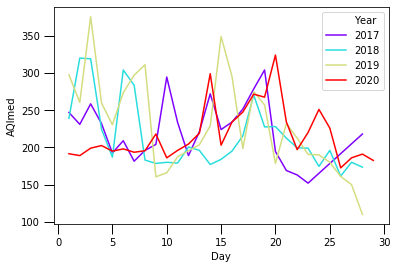

In [19]:
sns.lineplot(x = 'Day', y = 'AQImed', data = dayavgdf[(dayavgdf['Month']==2)], hue = 'Year', palette = 'rainbow')

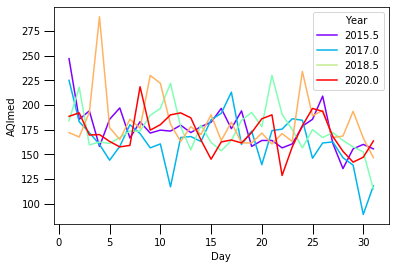

In [20]:
sns.lineplot(x = 'Day', y = 'AQImed', data = dayavgdf[(dayavgdf['Month']==3)], hue = 'Year', palette = 'rainbow')

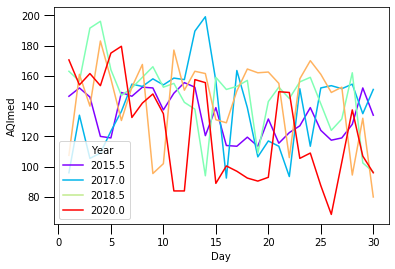

In [21]:
sns.lineplot(x = 'Day', y = 'AQImed', data = dayavgdf[(dayavgdf['Month']==4)], hue = 'Year', palette = 'rainbow')
#monthdata = dayavgdf[(dayavgdf['Month']==4)]
#plt.fill_between(x = monthdata.Date, y1 = monthavgdf.AQI-monthavgdf.AQIstd,
#                  y2 = monthavgdf.AQI+monthavgdf.AQIstd, color= 'k', alpha = 0.1)

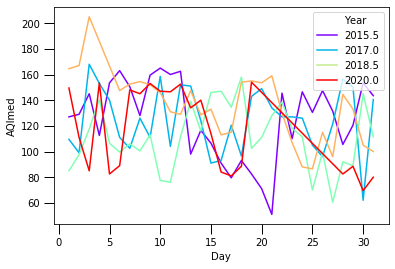

In [22]:
sns.lineplot(x = 'Day', y = 'AQImed', data = dayavgdf[(dayavgdf['Month']==5)], hue = 'Year', palette = 'rainbow')

-------------------------------------------------------------------------------
### Add a column of the daily average category and then create histogram of the distribution

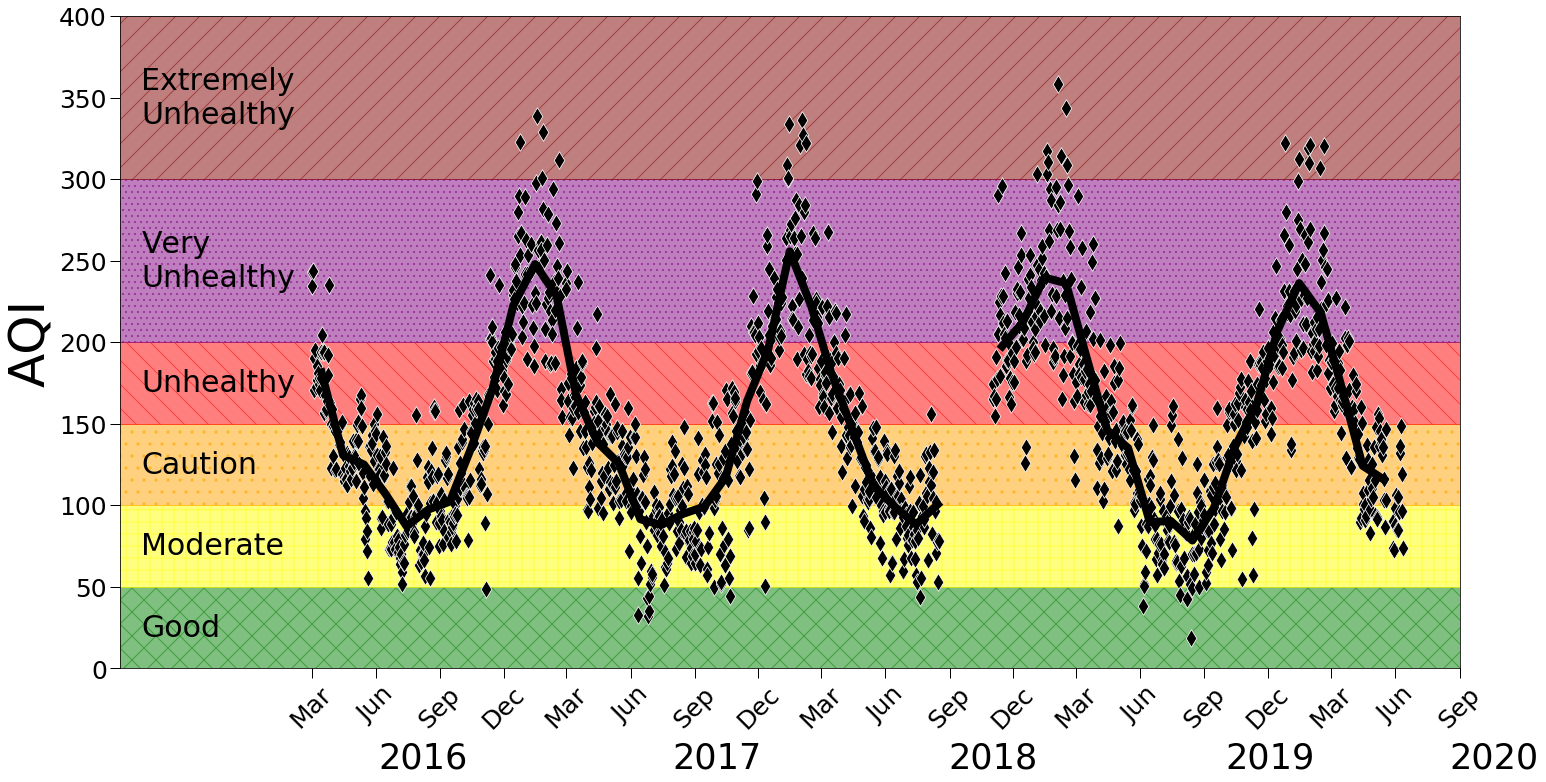

In [23]:
fig, ax = plt.subplots(figsize=(24,12))

trans = 0.5
xpoints = [datetime.strptime('2015-01-01', "%Y-%m-%d"), datetime.strptime('2020-12-01', "%Y-%m-%d")]
plt.fill_between(x = xpoints, y1 = 0, y2 = 50 , color = 'green', alpha = trans, hatch = 'x')
plt.fill_between(x = xpoints, y1 = 50, y2 = 100 , color = 'yellow', alpha = trans, hatch = '+')
plt.fill_between(x = xpoints, y1 = 100, y2 = 150 , color = 'orange', alpha = trans, hatch = '.')
plt.fill_between(x = xpoints, y1 = 150, y2 = 200 , color = 'red', alpha = trans, hatch = '\\')
plt.fill_between(x = xpoints, y1 = 200, y2 = 300 , color = 'purple', alpha = trans, hatch = '..')
plt.fill_between(x = xpoints, y1 = 300, y2 = 500 , color = 'maroon', alpha = trans, hatch = '/')

sns.scatterplot(x='Date',  y='AQI', data = dayavgdf, color = 'k', s = 155, marker = 'd')#, #legend = False,
sns.lineplot(x='Date',  y='AQI', data = monthavgdf[monthavgdf['Date']<'2018-08-17'], color = 'k', lw = 8)#, #legend = False,
sns.lineplot(x='Date',  y='AQI', data = monthavgdf[monthavgdf['Date']>'2018-11-01'], color = 'k', lw = 8)#, #legend = False,

textsize = 35
years = ['2016', '2017', '2018', '2019', '2020']
axis_positions = [0.3, 0.47, 0.63, 0.79, 0.92]
for xpos, year in zip(axis_positions, years):
    plt.figtext(xpos, 0.01, year, ha = 'center', fontsize = textsize)

quality_categories = ['Good', 'Moderate', 'Caution', 'Unhealthy', 'Very\nUnhealthy', 'Extremely\nUnhealthy']
y_positions = [25, 75, 125, 175, 250, 350]
textsize = 30
textstartdate = datetime.strptime('2015-07-01', "%Y-%m-%d")
for y_pos, category in zip(y_positions, quality_categories):
    plt.text(textstartdate, y_pos, category, va = 'center', fontsize = textsize)
    
plt.xticks([*map(lambda x: datetime.strptime(x, "%Y-%m"), ['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06', '2017-09', 
             '2017-12','2018-03', '2018-06', '2018-09', '2018-12', '2019-03', '2019-06', 
             '2019-09', '2019-12', '2020-03', '2020-06', '2020-09'])], rotation = 45, fontsize = 25)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.yticks(fontsize = 25)
plt.ylim(0,400)
plt.xlim(datetime.strptime('2015-06-01', "%Y-%m-%d"), datetime.strptime('2020-09-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize =50)
plt.xlabel('')

plt.savefig('AQImean.png', bbox_inches='tight')

In [26]:
# %%timeit 
# plt.close()
# fig,ax = plt.subplots(figsize=(24,12))
# #plt.figure()
# trans = 0.5
# # x0 = pd.Series(datetime.strptime('2015-01-01', "%Y-%m-%d"))
# # xpoints = x0.append(dayavgdf.Date)
# xpoints = [datetime.strptime('2015-01-01', "%Y-%m-%d"), datetime.strptime('2020-06-01', "%Y-%m-%d")]
# print(xpoints)
# plt.fill_between(x = xpoints, y1 = 0, y2 = 50 , color = 'green', alpha = trans, hatch = 'x')
# plt.fill_between(x = xpoints, y1 = 50, y2 = 100 , color = 'yellow', alpha = trans, hatch = '+')
# plt.fill_between(x = xpoints, y1 = 100, y2 = 150 , color = 'orange', alpha = trans, hatch = '.')
# plt.fill_between(x = xpoints, y1 = 150, y2 = 200 , color = 'red', alpha = trans, hatch = '\\')
# plt.fill_between(x = xpoints, y1 = 200, y2 = 300 , color = 'purple', alpha = trans, hatch = '..')
# plt.fill_between(x = xpoints, y1 = 300, y2 = 500 , color = 'maroon', alpha = trans, hatch = '/')
# sns.scatterplot(x='Date',  y='AQI', data = dayavgdf, color = 'k', s = 155, marker = 'd')#, #legend = False,
# #sns.lineplot(x='Date',  y='AQI', data = monthavgdf, color = 'k', lw = 8)#, #legend = False,
# sns.lineplot(x='Date',  y='AQI', data = monthavgdf[monthavgdf['Date']<'2018-08-17'], color = 'k', lw = 8)#, #legend = False,
# sns.lineplot(x='Date',  y='AQI', data = monthavgdf[monthavgdf['Date']>'2018-11-01'], color = 'k', lw = 8)#, #legend = False,
#                  #palette='muted', data=df, lw = 2)
# # plt.fill_between(x = monthavgdf.Date, y1 = monthavgdf.AQI-monthavgdf.AQIstd,
# #                  y2 = monthavgdf.AQI+monthavgdf.AQIstd, color= 'k', alpha = 0.1)
# #plt.xlim('2015-06-01', '2020-04-01')
# plt.xlim(datetime.strptime('2015-06-01', "%Y-%m-%d"), datetime.strptime('2020-06-01', "%Y-%m-%d"))

# plt.xticks(list(map(lambda x: datetime.strptime(x, "%Y-%m"), ['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06', '2017-09', 
#              '2017-12','2018-03', '2018-06', '2018-09', '2018-12', '2019-03', '2019-06', 
#              '2019-09', '2019-12', '2020-03', '2020-06'])), rotation = 45, fontsize = 25)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# #plt.annotate('2016', (0,0), (0,-50), xycoords='ax,es fraction', textcoords ='offset points', va = 'top')
# textsize = 35
# plt.figtext(0.3, 0.01, '2016', ha = 'center', fontsize = textsize)
# plt.figtext(0.47, 0.01, '2017', ha = 'center', fontsize = textsize)
# plt.figtext(0.63, 0.01, '2018', ha = 'center', fontsize = textsize)
# plt.figtext(0.79, 0.01, '2019', ha = 'center', fontsize = textsize)
# plt.figtext(0.92, 0.01, '2020', ha = 'center', fontsize = textsize)
# textstartdate = datetime.strptime('2015-07-01', "%Y-%m-%d")
# textstartdate = '2015-07-01'
# textsize = 30

# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 25, 'Good', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 75, 'Moderate', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 125, 'Caution', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 175, 'Unhealthy', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 262, 'Very\nUnhealthy', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 238, 'Unhealthy', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 362, 'Extremely', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime(textstartdate, "%Y-%m-%d"), 338, 'Unhealthy', va = 'center', fontsize = textsize)
# plt.yticks(fontsize = 25)
# plt.ylim(0,400)
# plt.ylabel('AQI', fontsize =50)
# plt.xlabel('')
# plt.savefig('AQImean.png', bbox_inches='tight')
# plt.show()

The AQI is divided in six categories and each category is meant to correspond to different health concern levels. Below is an explanation of the categories and their meanings.

    0 – 50 indicates “Good” AQI. At this level the quality of air is deemed to be satisfactory, and air pollution poses little or no risk.

    51 – 100 indicate “Moderate” AQI. This means acceptable Air quality. However, some pollutants might arouse modest health concern for a limited number of people. For instance, persons who are remarkably sensitive to ozone may experience respiratory symptoms.

    101 – 150 indicate “Unhealthy for Sensitive Groups” AQI. This category may not be able to affect the general health of the public. However, children, older adults, and persons with lung disease are at a greater risk from ozone exposure. Older children, adults and people with lung and heart disease are at greater risk from exposure to particulate matter.

    151 – 200 indicate “Unhealthy” AQI. In this category, every person might experience some adverse health effects. Sensitive group members may experience more serious effects. People with heart or lung disease, older adults and children should cut back or reschedule strenuous activities.

    201 – 300 indicate “Very Unhealthy” AQI. This would issue a health alert to mean that everybody may experience very serious health implications. People with heart or lung disease, older adults and children should significantly cut back or reschedule strenuous activities.

    Greater than 300 indicate “Hazardous” AQI. Air quality at this level is life-threatening and would issue warnings of emergency conditions for the entire population.


In [29]:
norm = mpl.colors.Normalize(-1,1)
aqicolors = [[0, 'green'], [55/350, 'yellow'], [75/350, 'yellow'], [105/350, 'orange'], [125/350, 'orange'], 
             [155/350, 'red'], [175/350, 'red'],[205/350, 'purple'], [275/350, 'purple'],[1, 'maroon']]
aqicmap = mpl.colors.LinearSegmentedColormap.from_list("", aqicolors)

In [30]:
# norm = matplotlib.colors.Normalize(-1,1)
# aqicolors = [[0, 'green'], [50/350, 'yellow'], [100/350, 'orange'], 
#              [150/350, 'red'], [200/350, 'purple'], [250/350, 'purple'], [1, 'maroon']]
# aqicmap = matplotlib.colors.LinearSegmentedColormap.from_list("", aqicolors)

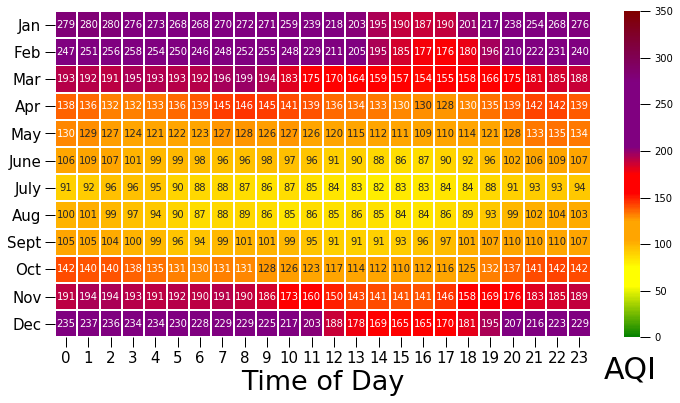

In [31]:
plt.close()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12,6))
seasonaltable = df.pivot_table(values='AQI',index='Hour',columns='Month')
seasonaltable = df.pivot_table(values='AQI',index='Month',columns='Hour')
sns.heatmap(seasonaltable, cmap=aqicmap,linecolor='white',
            linewidths=1, yticklabels = months, vmin = 0, vmax = 350, annot = True, fmt = '.0f')
#sns.heatmap(seasonaltable, cmap='coolwarm',linecolor='white',linewidths=1, yticklabels = months, vmin = 0, vmax = 350)
#sns.heatmap(seasonaltable, cmap=sns.diverging_palette(195, 280, s=85, l=25, n=20),linecolor='white',linewidths=1, yticklabels = months)
plt.ylabel('')
plt.xlabel('Time of Day', fontsize = 27)
plt.yticks(rotation = 0, fontsize = 15)
#plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
plt.xticks(fontsize=15)
plt.figtext(0.76,0.03,'AQI', fontsize = 30)
plt.savefig('Heatmap_AQIcols.png', bbox_inches='tight')
plt.show()

In [32]:
# plt.close()
# fig,ax = plt.subplots(figsize=(24,12))
# #plt.figure()
# trans = 0.5
# # x0 = pd.Series(datetime.strptime('2015-01-01', "%Y-%m-%d"))
# # xpoints = x0.append(dayavgdf.Date)
# xpoints = [datetime.strptime('2015-01-01', "%Y-%m-%d"), datetime.strptime('2020-03-01', "%Y-%m-%d")]
# print(xpoints)
# plt.fill_between(x = xpoints, y1 = 0, y2 = 50 , color = 'green', alpha = trans, hatch = 'x')
# plt.fill_between(x = xpoints, y1 = 51, y2 = 100 , color = 'yellow', alpha = trans, hatch = '+')
# plt.fill_between(x = xpoints, y1 = 101, y2 = 150 , color = 'orange', alpha = trans, hatch = '.')
# plt.fill_between(x = xpoints, y1 = 151, y2 = 200 , color = 'red', alpha = trans, hatch = '\\')
# plt.fill_between(x = xpoints, y1 = 201, y2 = 300 , color = 'purple', alpha = trans, hatch = '..')
# plt.fill_between(x = xpoints, y1 = 301, y2 = 500 , color = 'maroon', alpha = trans, hatch = '/')
# sns.scatterplot(x='Date',  y='AQImed', data = dayavgdf, color = 'k', s = 155, marker = 'd')#, #legend = False,
# sns.lineplot(x='Date',  y='AQI', data = monthavgdf, color = 'k', lw = 8)#, #legend = False,
#                  #palette='muted', data=df, lw = 2)
# # plt.fill_between(x = monthavgdf.Date, y1 = monthavgdf.AQI-monthavgdf.AQIstd,
# #                  y2 = monthavgdf.AQI+monthavgdf.AQIstd, color= 'k', alpha = 0.1)
# plt.xlim('2015-09-01', '2020-03-01')
# plt.xticks(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06', '2017-09', 
#              '2017-12','2018-03', '2018-06', '2018-09', '2018-12', '2019-03', '2019-06', 
#              '2019-09', '2019-12', '2020-03'], rotation = 45, fontsize = 25)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# #plt.annotate('2016', (0,0), (0,-50), xycoords='axes fraction', textcoords ='offset points', va = 'top')
# plt.figtext(0.27, 0.01, '2016', ha = 'center', fontsize = 30)
# plt.figtext(0.45, 0.01, '2017', ha = 'center', fontsize = 30)
# plt.figtext(0.61, 0.01, '2018', ha = 'center', fontsize = 30)
# plt.figtext(0.79, 0.01, '2019', ha = 'center', fontsize = 30)
# plt.figtext(0.9, 0.01, '2020', ha = 'center', fontsize = 30)
# textsize = 30
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 25, 'Good', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 75, 'Moderate', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 125, 'Unhealthy for sensitive groups', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 175, 'Unhealthy', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 250, 'Very Unhealthy', va = 'center', fontsize = textsize)
# plt.text(datetime.strptime('2015-10-01', "%Y-%m-%d"), 350, 'Hazardous', va = 'center', fontsize = textsize)
# plt.yticks(fontsize = 25)
# plt.ylim(0,400)
# plt.ylabel('AQI', fontsize =50)
# plt.xlabel('')
# plt.savefig('AQImedian.png')
# plt.show()

In [33]:
# plt.close()
# plt.figure(figsize=(20,10))
# sns.scatterplot(x='Date', y='AQI', data = df) 
#                  #markers = True, dashes = False, #legend = False,
#                  #palette='muted', data=df, lw = 2)
# plt.xlim(min(df.Date), max(df.Date))
# plt.show()